# Hourly Electricity Consumption Dataset

## Overview

The Hourly Electricity Consumption dataset is a collection of time series data representing electricity consumption. It is primarily used for analyzing and forecasting electricity usage patterns on an hourly basis.

## Data Description

### Features

- **Series ID**: An identifier for each time series (e.g., T1, T2, T3, ..., T321).
- **Timestamp**: The dataset includes timestamps that mark the beginning of each hourly interval.
- **Electricity Consumption**: For each timestamp, there is a corresponding value that represents the electricity consumption in kilowatt-hours (kWh).

> Forecast length: 96 hours

### Data Frequency

- **Hourly**: The data is recorded at hourly intervals, providing a detailed view of electricity usage throughout each day.

### Time Period

- **Historical Span**: The dataset covers a specific historical period, capturing hourly electricity consumption over several months or years, depending on the dataset version.

### Usage

The dataset can be utilized for:

- **Time Series Analysis**: Understanding trends, seasonality, and anomalies in electricity consumption.
- **Forecasting**: Predicting future electricity usage to optimize grid operations and energy production.
- **Energy Management**: Identifying consumption patterns to implement energy-saving measures and load balancing.

## Dataset Structure

### Example Data

| Series ID | Timestamp           | Electricity Consumption (kWh) |
|-----------|---------------------|-------------------------------|
| T1        | 2020-01-01 00:00:00 | 1500                          |
| T1        | 2020-01-01 01:00:00 | 1480                          |
| T1        | 2020-01-01 02:00:00 | 1475                          |
| ...       | ...                 | ...                           |
| T2        | 2020-01-01 00:00:00 | 1600                          |
| T2        | 2020-01-01 01:00:00 | 1580                          |
| T2        | 2020-01-01 02:00:00 | 1575                          |
| ...       | ...                 | ...                           |

### Fields

1. **Series ID**
   - Type: String
   - Description: The identifier for each time series (e.g., T1, T2, T3, ..., T321).
2. **Timestamp**
   - Type: DateTime
   - Description: The specific date and hour of the electricity consumption measurement.
3. **Electricity Consumption**
   - Type: Float
   - Description: The amount of electricity consumed during the hour, measured in kilowatt-hours (kWh).

## Applications

### Energy Forecasting

- **Short-term Forecasting**: Predicting electricity consumption in the next few hours to a few days.
- **Long-term Forecasting**: Estimating electricity usage patterns for weeks, months, or even years ahead.

### Demand Response

- **Load Shifting**: Identifying opportunities to shift electricity usage to off-peak hours.
- **Peak Load Management**: Understanding and managing peak consumption periods to avoid grid overload.

### Anomaly Detection

- **Detecting Spikes**: Identifying sudden increases in electricity consumption that may indicate issues or unusual activity.
- **Usage Patterns**: Finding irregularities in daily or seasonal usage patterns.

### Energy Efficiency

- **Consumption Trends**: Analyzing long-term trends to implement energy-saving strategies.
- **Operational Efficiency**: Optimizing the performance of electrical equipment and systems based on usage data.

## Conclusion

The Hourly Electricity Consumption dataset is a valuable resource for energy analysts, researchers, and utility companies. It provides granular data that can be used to improve energy efficiency, optimize grid operations, and develop predictive models for electricity usage. The detailed hourly recordings allow for comprehensive analysis and robust forecasting capabilities.


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
%pip install gluonts

Note: you may need to restart the kernel to use updated packages.


In [3]:
from gluonts.dataset.repository import get_dataset, dataset_names

e:\ReadyTensor\rt-datasets-forecasting\.venv\Lib\site-packages\gluonts\json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [4]:
print(f"Available datasets: {dataset_names}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki2000_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_tlc_daily', 'uber_tlc_hourly', 'airpassengers', 'australian_electricity_demand', 'electricity_hourly', 'electricity_weekly', 'rideshare_wit

In [5]:
gluonts_dataset_name = "electricity_hourly"

In [6]:
dataset_name = "electricity_forecast_len_96"

In [7]:
dataset_path = Path(f'./../../raw/{dataset_name}/')
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [8]:
data = get_dataset(gluonts_dataset_name, regenerate=True,path=dataset_path)

Download electricity_hourly_dataset.zip:: 0.00B [00:00, ?B/s]

Download electricity_hourly_dataset.zip:: 11.3MB [00:03, 2.97MB/s]
creating json files: 100%|██████████| 321/321 [00:00<00:00, 160914.50it/s]


In [9]:
data.metadata.json()

'{"freq": "H", "target": null, "feat_static_cat": [{"name": "feat_static_cat_0", "cardinality": "321"}], "feat_static_real": [], "feat_dynamic_real": [], "feat_dynamic_cat": [], "prediction_length": 48}'

In [10]:
df_gluonts = pd.DataFrame(data.train)
print("data shape : ",df_gluonts.shape)
print(df_gluonts.iloc[0]['target'].shape)
print(df_gluonts['item_id'].unique())
df_gluonts.head()

data shape :  (321, 4)
(26256,)
['T1' 'T2' 'T3' 'T4' 'T5' 'T6' 'T7' 'T8' 'T9' 'T10' 'T11' 'T12' 'T13'
 'T14' 'T15' 'T16' 'T17' 'T18' 'T19' 'T20' 'T21' 'T22' 'T23' 'T24' 'T25'
 'T26' 'T27' 'T28' 'T29' 'T30' 'T31' 'T32' 'T33' 'T34' 'T35' 'T36' 'T37'
 'T38' 'T39' 'T40' 'T41' 'T42' 'T43' 'T44' 'T45' 'T46' 'T47' 'T48' 'T49'
 'T50' 'T51' 'T52' 'T53' 'T54' 'T55' 'T56' 'T57' 'T58' 'T59' 'T60' 'T61'
 'T62' 'T63' 'T64' 'T65' 'T66' 'T67' 'T68' 'T69' 'T70' 'T71' 'T72' 'T73'
 'T74' 'T75' 'T76' 'T77' 'T78' 'T79' 'T80' 'T81' 'T82' 'T83' 'T84' 'T85'
 'T86' 'T87' 'T88' 'T89' 'T90' 'T91' 'T92' 'T93' 'T94' 'T95' 'T96' 'T97'
 'T98' 'T99' 'T100' 'T101' 'T102' 'T103' 'T104' 'T105' 'T106' 'T107'
 'T108' 'T109' 'T110' 'T111' 'T112' 'T113' 'T114' 'T115' 'T116' 'T117'
 'T118' 'T119' 'T120' 'T121' 'T122' 'T123' 'T124' 'T125' 'T126' 'T127'
 'T128' 'T129' 'T130' 'T131' 'T132' 'T133' 'T134' 'T135' 'T136' 'T137'
 'T138' 'T139' 'T140' 'T141' 'T142' 'T143' 'T144' 'T145' 'T146' 'T147'
 'T148' 'T149' 'T150' 'T151' 'T152

,target,start,item_id,feat_static_cat
0,"[14.0, 18.0, 21.0, 20.0, 22.0, 20.0, 20.0, 20....",2012-01-01 00:00,T1,[0]
1,"[69.0, 92.0, 96.0, 92.0, 91.0, 92.0, 91.0, 92....",2012-01-01 00:00,T2,[1]
2,"[234.0, 312.0, 312.0, 312.0, 312.0, 187.0, 138...",2012-01-01 00:00,T3,[2]
3,"[415.0, 556.0, 560.0, 443.0, 346.0, 340.0, 376...",2012-01-01 00:00,T4,[3]
4,"[215.0, 292.0, 272.0, 213.0, 190.0, 178.0, 199...",2012-01-01 00:00,T5,[4]


In [11]:
df_test = pd.DataFrame(data.test)
print("data shape : ",df_test.shape)
print(df_test.iloc[0]['target'].shape)
print(df_test['item_id'].unique())
print("Are both datasets the same ?? ",df_gluonts.equals(df_test))
df_test.head()


data shape :  (321, 4)
(26304,)
['T1' 'T2' 'T3' 'T4' 'T5' 'T6' 'T7' 'T8' 'T9' 'T10' 'T11' 'T12' 'T13'
 'T14' 'T15' 'T16' 'T17' 'T18' 'T19' 'T20' 'T21' 'T22' 'T23' 'T24' 'T25'
 'T26' 'T27' 'T28' 'T29' 'T30' 'T31' 'T32' 'T33' 'T34' 'T35' 'T36' 'T37'
 'T38' 'T39' 'T40' 'T41' 'T42' 'T43' 'T44' 'T45' 'T46' 'T47' 'T48' 'T49'
 'T50' 'T51' 'T52' 'T53' 'T54' 'T55' 'T56' 'T57' 'T58' 'T59' 'T60' 'T61'
 'T62' 'T63' 'T64' 'T65' 'T66' 'T67' 'T68' 'T69' 'T70' 'T71' 'T72' 'T73'
 'T74' 'T75' 'T76' 'T77' 'T78' 'T79' 'T80' 'T81' 'T82' 'T83' 'T84' 'T85'
 'T86' 'T87' 'T88' 'T89' 'T90' 'T91' 'T92' 'T93' 'T94' 'T95' 'T96' 'T97'
 'T98' 'T99' 'T100' 'T101' 'T102' 'T103' 'T104' 'T105' 'T106' 'T107'
 'T108' 'T109' 'T110' 'T111' 'T112' 'T113' 'T114' 'T115' 'T116' 'T117'
 'T118' 'T119' 'T120' 'T121' 'T122' 'T123' 'T124' 'T125' 'T126' 'T127'
 'T128' 'T129' 'T130' 'T131' 'T132' 'T133' 'T134' 'T135' 'T136' 'T137'
 'T138' 'T139' 'T140' 'T141' 'T142' 'T143' 'T144' 'T145' 'T146' 'T147'
 'T148' 'T149' 'T150' 'T151' 'T152

,target,start,item_id,feat_static_cat
0,"[14.0, 18.0, 21.0, 20.0, 22.0, 20.0, 20.0, 20....",2012-01-01 00:00,T1,[0]
1,"[69.0, 92.0, 96.0, 92.0, 91.0, 92.0, 91.0, 92....",2012-01-01 00:00,T2,[1]
2,"[234.0, 312.0, 312.0, 312.0, 312.0, 187.0, 138...",2012-01-01 00:00,T3,[2]
3,"[415.0, 556.0, 560.0, 443.0, 346.0, 340.0, 376...",2012-01-01 00:00,T4,[3]
4,"[215.0, 292.0, 272.0, 213.0, 190.0, 178.0, 199...",2012-01-01 00:00,T5,[4]


## Extracting first county data from the dataset

In [12]:
from datetime import timedelta

df_gluonts['start'] = df_gluonts['start'].dt.to_timestamp()

# Initialize an empty DataFrame for the result
timeseries_df = pd.DataFrame()

# Process each item
for idx, row in df_gluonts.iterrows():
    start_time = row['start']
    item_id = row['item_id']
    values = row['target']
    
    # Create a DataFrame for the current series
    temp_df = pd.DataFrame({
        'series_id': item_id,
        'timestamp': pd.date_range(start=start_time, periods=len(values), freq='H'),
        'consumption': values
    })
    
    # Append to the result DataFrame
    timeseries_df = pd.concat([timeseries_df, temp_df], ignore_index=True)

timeseries_df

,series_id,timestamp,consumption
0,T1,2012-01-01 00:00:00,14.0
1,T1,2012-01-01 01:00:00,18.0
2,T1,2012-01-01 02:00:00,21.0
3,T1,2012-01-01 03:00:00,20.0
4,T1,2012-01-01 04:00:00,22.0
...,...,...,...
8428171,T321,2014-12-29 19:00:00,3150.0
8428172,T321,2014-12-29 20:00:00,3126.0
8428173,T321,2014-12-29 21:00:00,2959.0
8428174,T321,2014-12-29 22:00:00,2935.0


# Identify columns to use for the dataset

In [13]:
series_col = "series_id"
epoch_col = ''
time_col = 'timestamp'
value_col = 'consumption'
exog_cols=[]

# Visualize

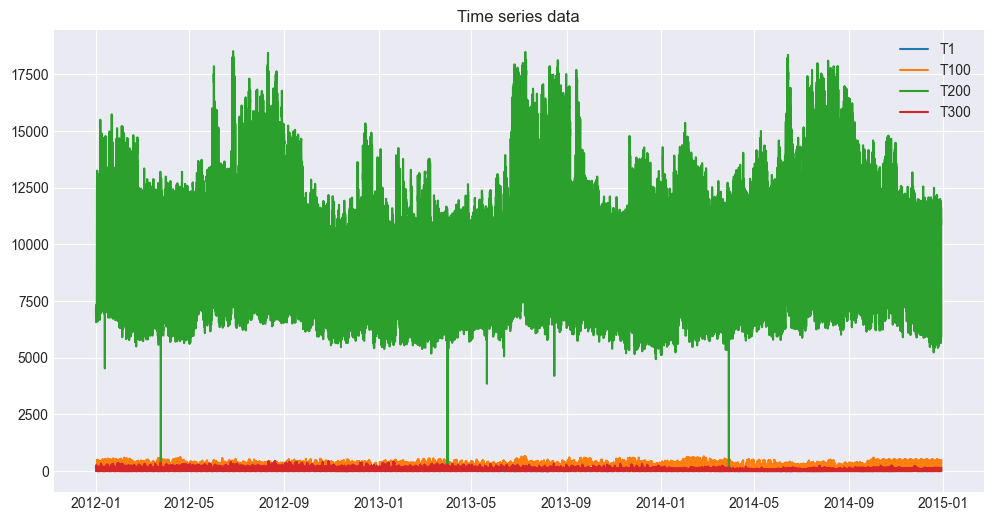

In [14]:
plt.style.use('seaborn-v0_8-darkgrid')

series_ids_to_plot = ['T1', 'T100', 'T200', 'T300']

df_to_plot = timeseries_df[timeseries_df['series_id'].isin(series_ids_to_plot)]

plt.figure(figsize=(12, 6))

for series_id in series_ids_to_plot:
    series_data = df_to_plot[df_to_plot['series_id'] == series_id]
    plt.plot(series_data['timestamp'], series_data['consumption'], label=series_id)
plt.title(f"Time series data")
plt.grid(True)
plt.legend()
plt.show()


# Save Data

In [15]:
timeseries_df.sort_values(by=[series_col, time_col], inplace=True)
timeseries_df.to_csv(outp_fname, index=False)

In [16]:
timeseries_df.shape

(8428176, 3)